In [1]:
import pandas as pd
import urllib
import urllib2
from bs4 import BeautifulSoup as bs
import re
import requests
import numpy as np
import pickle

import nltk

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%pylab inline

sns.set_style("darkgrid", {"text.color": ".1"})

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = {'col1': ["Hello I love food", "I hate chicken", "This is great"]}
df = pd.DataFrame(data=d)

In [3]:
df

,col1
0,Hello I love food
1,I hate chicken
2,This is great


In [2]:
df_statml = pd.read_csv("StatMLPapers_tweets.csv")
df_statml['year'] = 2016
df_statml['genre'] = 'ML'
df_statml['source'] = 'Twitter'


In [3]:
df_statml = df_statml.sort_values(by="created_at").reset_index(drop=True)

In [4]:
for i in range(0,810):
    df_statml.set_value(i, 'year', 2015)

In [5]:
df_16_NIPS = pd.read_csv('open_review_abstracts_NIPS2016.csv')
df_16_NIPS['year'] = 2016
df_16_NIPS['genre'] = 'ML'
df_16_NIPS['source'] = 'NIPS'

In [6]:
df_17_ICLR = pd.read_csv('open_review_abstracts_ICLR2017.csv')
df_17_ICLR['year'] = 2017
df_17_ICLR['genre'] = 'DL'
df_17_ICLR['source'] = 'ICLR'

In [7]:
df_16_NIPS_NAMPI = pd.read_csv('open_review_abstracts_NIPS16_NAMPI.csv')
df_16_NIPS_NAMPI['year'] = 2016
df_16_NIPS_NAMPI['genre'] = 'ML'
df_16_NIPS_NAMPI['source'] = 'NIPS'

In [8]:
df_16_NIPS_MLITS = pd.read_csv('open_review_abstracts_NIPS16_MLITS.csv')
df_16_NIPS_MLITS['year'] = 2016
df_16_NIPS_MLITS['genre'] = 'ML'
df_16_NIPS_MLITS['source'] = 'NIPS'

In [9]:
df_16_ICLR = pd.read_csv('open_review_abstracts_ICLR16.csv')
df_16_ICLR['year'] = 2016
df_16_ICLR['genre'] = 'DL'
df_16_ICLR['source'] = 'ICLR'

In [10]:
df_CVPR_16 = pd.read_csv('CVPR_2016/cvpr_2016.csv')
df_CVPR_16['year'] = 2016
df_CVPR_16['genre'] = 'CV'
df_CVPR_16['source'] = 'CVPR'

In [11]:
df_CVPR_15 = pd.read_csv('CVPR_2016/cvpr_2015.csv')
df_CVPR_15['year'] = 2015
df_CVPR_15['genre'] = 'CV'
df_CVPR_15['source'] = 'CVPR'

In [12]:
df_CVPR_14 = pd.read_csv('CVPR_2016/cvpr_2014.csv')
df_CVPR_14['year'] = 2014
df_CVPR_14['genre'] = 'CV'
df_CVPR_14['source'] = 'CVPR'

In [13]:
df_CVPR_13 = pd.read_csv('CVPR_2016/cvpr_2013.csv')
df_CVPR_13['year'] = 2013
df_CVPR_13['genre'] = 'CV'
df_CVPR_13['source'] = 'CVPR'

In [14]:
df_NIPS = pd.read_csv('NIPS/NIPS.csv')
df_NIPS['genre'] = 'ML'
df_NIPS['source'] = 'NIPS'

df_NIPS2 = pd.read_csv('NIPS/NIPS_new.csv')
df_NIPS2['genre'] = 'ML'
df_NIPS2['source'] = 'NIPS'

df_NIPS3 = pd.read_csv('NIPS/NIPS_new2.csv')
df_NIPS3['genre'] = 'ML'
df_NIPS3['source'] = 'NIPS'

In [15]:
print df_NIPS.shape, df_NIPS2.shape, df_NIPS3.shape

(2812, 5) (2255, 5) (3221, 5)


In [16]:
df_NIPS.year.unique()

array([2016, 2010, 2015, 2008, 2009, 2011, 2014, 2012])

In [17]:
df_NIPS2.year.unique()

array([2010, 2016, 2008, 2015, 2013, 2011, 2009])

In [18]:
df_NIPS3.year.unique()

array([2016, 2015, 2012, 2014, 2013, 2011, 2010, 2009, 2008])

In [19]:
df_JMLR_16 = pd.read_csv('JMLR/JMLR_16.csv')
df_JMLR_16['genre'] = 'ML'
df_JMLR_16['source'] = 'JMLR'

In [20]:
df_JMLR_15 = pd.read_csv('JMLR/JMLR_15.csv')
df_JMLR_15['genre'] = 'ML'
df_JMLR_15['source'] = 'JMLR'

In [21]:
df_JMLR_14 = pd.read_csv('JMLR/JMLR_14.csv')
df_JMLR_14['genre'] = 'ML'
df_JMLR_14['source'] = 'JMLR'

In [22]:
df_JMLR_13 = pd.read_csv('JMLR/JMLR_13.csv')
df_JMLR_13['genre'] = 'ML'
df_JMLR_13['source'] = 'JMLR'

In [23]:
df_arxiv = pd.read_csv("reddit/reddit_scraped_arxivs.csv")
df_arxiv['year'] = 2016
df_arxiv['genre'] = 'ML'
df_arxiv['source'] = 'arXiv'

In [24]:
df_open_rev = pd.read_csv("reddit/reddit_scraped_openreview.csv")
df_open_rev['year'] = 2016
df_open_rev['genre'] = 'ML'
df_open_rev['source'] = 'OpenReview'

In [25]:
df_open_rev_s = df_open_rev[['title', 'abstract', 'genre', 'source', 'year']]
df_arxiv_s = df_arxiv[['title', 'abstract', 'genre', 'source', 'year']]
df_statml_s = df_statml[['text', 'abstract', 'genre', 'source', 'year']]

In [26]:
df_NIPS.year.unique()

array([2016, 2010, 2015, 2008, 2009, 2011, 2014, 2012])

In [27]:
pd.options.mode.chained_assignment = None 

#find = re.compile(r"^(.*?)\..*")
new_text = []
find = re.compile(r"^([^.]*).*")
for l in df_statml_s['text']:
    m = re.match(find, l)
    new_text.append(m.group(1))

df_statml_s['title'] = new_text

In [28]:
df_statml_s.drop(["text"], axis=1, inplace=True)

In [29]:
frames = [df_statml_s, df_arxiv_s, df_open_rev_s, df_JMLR_13, df_JMLR_14, df_JMLR_15,
         df_JMLR_16, df_CVPR_13, df_CVPR_14, df_CVPR_15, df_CVPR_16, df_16_ICLR,
         df_16_NIPS_MLITS, df_16_NIPS_NAMPI, df_17_ICLR, df_16_NIPS, df_NIPS3]

In [30]:
result = pd.concat(frames, ignore_index=True)

In [31]:
result.shape

(10724, 5)

In [32]:
len(result.abstract.unique())

9947

In [33]:
unik_titles = result.title.unique().tolist()
len(result.title.unique())

9806

In [34]:
result = result.drop_duplicates("abstract")
result = result.drop_duplicates("title")

In [35]:
result.shape

(9581, 5)

In [36]:
len(result.title.unique())

9581

In [37]:
result['abstract'] = result['abstract'].str.replace('Abstract:?' , '')

In [38]:
result['title'] = result['title'].str.replace('\[R\]', '')

In [39]:
result[result.year == 2016].shape

(3389, 5)

In [40]:
result[result.year == 2015].shape

(2008, 5)

In [41]:
result[result.year == 2014].shape

(1254, 5)

In [42]:
result[result.year==2012].shape

(342, 5)

In [43]:
result[result.year == 2013].shape

(1113, 5)

In [44]:
result[result.year == 2017].shape

(417, 5)

In [45]:
result.reset_index(drop=True, inplace=True)

indexes = []
for abst in result[result.genre=='ML']["abstract"]:
    try:
        try:
            if ("deep learning" in abst or "deep neural" in abst):
                indexes.append(result[result.abstract==abst].index.tolist()[0])
        except AttributeError:
            pass
    except TypeError:
        pass

for i in indexes:
    result.set_value(i, 'genre', 'DL')

result[result.genre=='ML'].shape # now 1071 DLs and 6258 MLs

(6519, 5)

In [49]:
result.groupby(['genre']).count()

,abstract,source,title,year
genre,,,,
CV,2247,2247,2247,2247
DL,815,815,815,815
ML,6518,6519,6519,6519


In [50]:
result.groupby(['year'])['title'].count()/result.shape[0]

year
2008    0.023275
2009    0.026824
2010    0.030059
2011    0.030268
2012    0.035696
2013    0.116167
2014    0.130884
2015    0.209581
2016    0.353721
2017    0.043524
Name: title, dtype: float64

In [51]:
result[result['source'] == 'NIPS'].index

Int64Index([6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147,
            ...
            9571, 9572, 9573, 9574, 9575, 9576, 9577, 9578, 9579, 9580],
           dtype='int64', length=3026)

In [52]:
result.shape

(9581, 5)

In [53]:
result.head()

,abstract,genre,source,title,year
0,Text documents are structured on multiple le...,ML,Twitter,Document Context Language Models,2015
1,Despite the importance of sparsity signal mo...,ML,Twitter,Dynamic Filtering of Time-Varying Sparse Signa...,2015
2,"In this paper, we propose a general framewor...",ML,Twitter,Learning to classify with possible sensor fail...,2015
3,Sampling from various kinds of distributions...,ML,Twitter,Theoretical guarantees for approximate samplin...,2015
4,We provide theoretical and empirical evidenc...,ML,Twitter,Non-linear Causal Inference using Gaussianity ...,2015


In [1191]:
p = pd.DataFrame(result.groupby(['year', 'genre'])["title"].count()).reset_index()

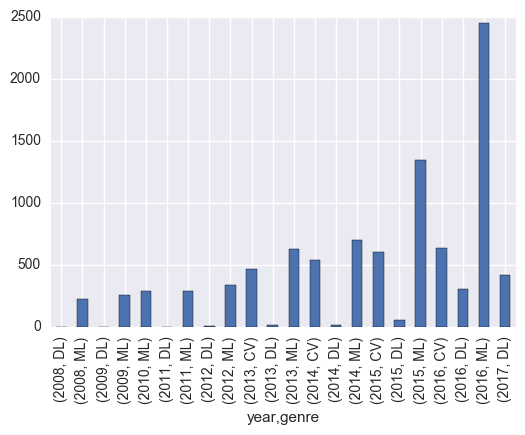

In [1192]:
result.groupby(['year', 'genre']).count()["title"].plot(kind="bar")

In [1193]:
res_ml = result[result.genre=='ML']
res_dl = result[result.genre=='DL']
res_cv = result[result.genre=='CV']

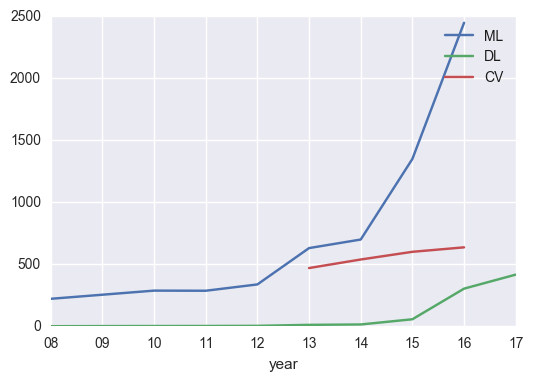

In [1221]:
fig, ax = plt.subplots()
res_ml.groupby(['year']).count()['title'].plot()
res_dl.groupby(['year']).count()['title'].plot()
res_cv.groupby(['year']).count()['title'].plot()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '08'
labels[1] = '09'
labels[2] = '10'
labels[3] = '11'
labels[4] = '12'
labels[5] = '13'
labels[6] = '14'
labels[7] = '15'
labels[8] = '16'
labels[9] = '17'
ax.set_xticklabels(labels)
plt.legend(["ML", "DL", "CV"])

In [1430]:
from scipy.optimize import curve_fit

In [1249]:
x_ml = np.arange(2008,2017.0,1)
y_ml = res_ml.groupby(['year']).count()['title'].values
z_ml = np.polyfit(x_ml, y_ml, 3)
p_ml = np.poly1d(z_ml)

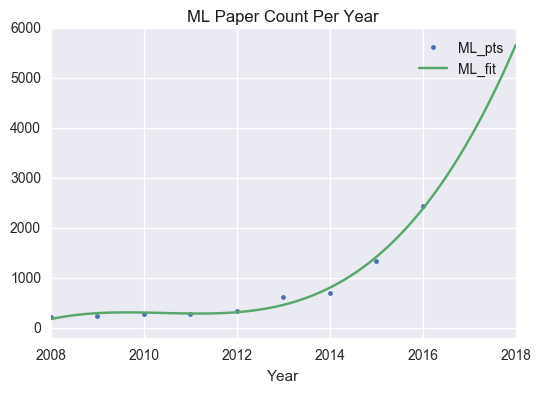

In [1665]:
xp = np.linspace(2008.0, 2018.0, 100)
_ = plt.plot(x_ml, y_ml, '.', xp, p_ml(xp))
plt.ylim(-200, 6000)
plt.legend(["ML_pts", "ML_fit"])
plt.title("ML Paper Count Per Year")
plt.xlabel("Year")
plt.show()

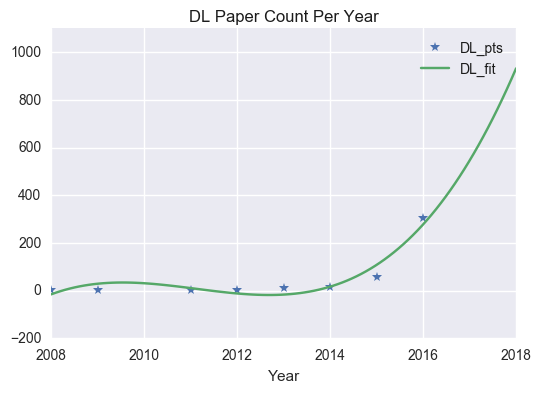

In [1672]:
x_dl = np.array([2008.0, 2009.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0])
y_dl = res_dl.groupby(['year']).count()['title'].values[:-1]
z_dl = np.polyfit(x_dl, y_dl, 3)
p_dl = np.poly1d(z_dl)

xp = np.linspace(2008.0, 2018.0, 100)
_ = plt.plot(x_dl, y_dl, '*', xp, p_dl(xp))
plt.ylim(-200, 1100)
plt.legend(["DL_pts", "DL_fit"])
plt.title("DL Paper Count Per Year")
plt.xlabel("Year")
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


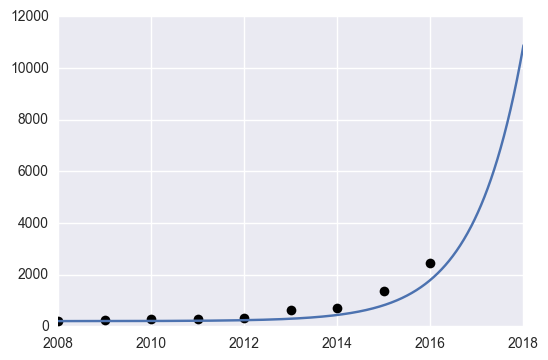

In [1542]:
def exponenial_func(x, a, b, c):
    return a*np.exp(b*x)+c

popt, pcov = curve_fit(exponenial_func, x_ml, y_ml, p0=(0.0004, 0.95, 200))

xx = np.linspace(8.0, 18.0, 1000)
yy = exponenial_func(xx, *popt)

plot(x,y,'ko')
plot(xx + 2000, yy)

In [1251]:
result_abs = result['abstract'].tolist()

In [1252]:
import enchant 

In [1253]:
is_english = enchant.Dict("en_US")

In [491]:
tot_words = pickle.load(open("total_noneng_words_to_keep.pkl", "rb"))
tokeep = misspell + tot_words
throwout = list(set(misspell) - set(tokeep))

In [1254]:
bad_words = ['tasks', 'methods', 'using', 'propose', 'based', 'problem',
            'results', 'method', 'different', 'demonstrate', 'paper',
            'approach', 'task', 'used', 'proposed', 'provide', 'study'
            'use', 'problems', 'work', 'present', "es", "al", "et", "em", "ed", "ca", 
            "ial", "rl", "ii", "iii", "res", "ing", "ts", 'consider', 
            'include', 'issue', 'follow', 'remain', 'reation', 
            'achiev', 'techniqu', 'mage', 'cifar', 'learnng', 'ful', 'introduce',
            'gorithms', 'ths', 'gorithm', 'featur', 'ful', 'subs', 'rs', 'ell',
            'model', 'function', 'algorithm']

bad_symb = ['\\',',','^',';',':','/','`','*','_','`','~','%','&','|','@',
               '{','}','[',']','(',')','>','<','"','#','+','.','!','=','?','$','\'']

def abstract_cleaner(abstract):
    is_english = enchant.Dict("en_US")
    abstract = "".join([i for i in abstract if not i.isdigit()])
    abstract = abstract.replace("\n", " ")
    abstract = abstract.replace("-", "")
    abstract = abstract.lower()
    for char in bad_symb:
        if char in abstract:
            abstract = abstract.replace(char, "")
    for char in bad_words:
        if char.strip() in abstract.split(" "):
            abstract = abstract.replace(char, "")
    for word in throwout:
        if word in abstract.split(" "):
            abstract = abstract.replace(word, "")
    for word in abstract:
        if not is_english.check(word):
            abstract = abstract.replace(word, "")
    abstract = filter(None, abstract)
    return abstract 

In [1255]:
result_abs = map(str, result_abs)
result_abs = map(abstract_cleaner, result_abs)

In [1256]:
first_word_squasher = pickle.load(open("first_word_squasher.pkl", "rb"))
#second_word_squasher = pickle.load(open("second_word_squasher.pkl", "rb"))


In [1257]:
def first_word_squash(abstract):
    abstract = abstract.lower()
    for word in abstract.split(" "): 
        word = word.strip()
        if word in first_word_squasher.keys():
#             try:
            abstract = abstract.replace(word, first_word_squasher[word]) 
#             except UnicodeDecodeError:
#                 abstract = abstract 
    return abstract


In [1258]:
result_abs = map(first_word_squash, result_abs)

In [968]:
misspell = []
# try:
for abst in result_abs:
    for word in abst.split(" "):
        if (len(word) != 0 and not is_english.check(word.strip())):
            misspell.append(word)
# except ValueError:
#     pass

In [969]:
misspell = list(set(misspell))

In [974]:
throwout = list(set(misspell) - set(tokeep))

In [970]:
mis2 = [x for x in misspell if len(x) < 3]
mis3 = [x for x in misspell if len(x) == 3]
mis4 = [x for x in misspell if len(x) == 4]
mis5 = [x for x in misspell if len(x) == 5]
mis6 = [x for x in misspell if len(x) == 6]
mis7 = [x for x in misspell if len(x) == 7]
mis8 = [x for x in misspell if len(x) == 8]
mis9 = [x for x in misspell if len(x) == 9]
mis10 = [x for x in misspell if len(x) == 10]
mis11 = [x for x in misspell if len(x) == 11]

In [971]:
misspell = list(set(misspell) - set(mis2))
misspell = list(set(misspell) - set(mis3))
misspell = list(set(misspell) - set(mis4))
misspell = list(set(misspell) - set(mis5))
misspell = list(set(misspell) - set(mis6))
misspell = list(set(misspell) - set(mis7))
misspell = list(set(misspell) - set(mis8))
misspell = list(set(misspell) - set(mis9))
misspell = list(set(misspell) - set(mis10))
misspell = list(set(misspell) - set(mis11))

In [972]:
tot = elevens + decs + novs + octs + septs + sexts + pents + trips + quads
pickle.dump(tot, open("total_noneng_words_to_keep.pkl", "wb"))

In [973]:
tot_words = pickle.load(open("total_noneng_words_to_keep.pkl", "rb"))
tokeep = misspell + tot_words

In [1732]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=0.005, max_df=0.8, ngram_range=(1,3))
cvec.fit(result_abs_final)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.8, max_features=None, min_df=0.005,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [1733]:
df_countvect  = pd.DataFrame(cvec.transform(result_abs_final).todense(),
             columns=cvec.get_feature_names())

#df = df.transpose().sort_values(0, ascending=False).transpose()



In [1734]:
df_countvect.head()

,ability,able,absence,absolute,abstract,accelerate,access,according,account,accuracies,...,window,word,works,world,worst,worstcase,years,yield,yielding,zero
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1685]:
vocab = cvec.vocabulary_

In [1686]:
vocab

{u'localized': 920,
 u'increase': 794,
 u'shows': 1478,
 u'designing': 429,
 u'typically': 1677,
 u'projection': 1240,
 u'interaction': 832,
 u'absolute': 3,
 u'feature': 629,
 u'experimentally': 580,
 u'fit': 645,
 u'multidimensional': 1016,
 u'component': 288,
 u'series': 1461,
 u'substantially': 1582,
 u'message': 978,
 u'combinatorial': 264,
 u'adapt': 25,
 u'assignment': 110,
 u'estimate': 552,
 u'moment': 1007,
 u'purpose': 1266,
 u'needed': 1040,
 u'perturbations': 1158,
 u'tree': 1669,
 u'spectrum': 1528,
 u'recommender': 1313,
 u'subset': 1579,
 u'vertices': 1734,
 u'rich': 1396,
 u'patch': 1139,
 u'sensitivity': 1451,
 u'extend': 597,
 u'nature': 1032,
 u'extent': 603,
 u'argue': 98,
 u'source': 1514,
 u'rgb': 1395,
 u'graphical': 709,
 u'employ': 517,
 u'euclidean': 556,
 u'conditioned': 306,
 u'big': 161,
 u'computationally': 298,
 u'maximizing': 967,
 u'simulated': 1490,
 u'lasso': 885,
 u'devices': 448,
 u'role': 1409,
 u'brings': 185,
 u'scale': 1424,
 u'variable': 1720,

In [1687]:
counts = [(key, value) for key, value in dict(df_countvect.sum(axis=0).sort_values(ascending=False)).items()]
counts.sort(key=lambda x: x[1], reverse=True)

In [1688]:
df_count_dict = dict(df_countvect.sum(axis=0).sort_values(ascending=False))
counts_new = { k:v for k, v in df_count_dict.items() if v < 2000}
len(counts_new)

1737

In [1689]:
keeps = {'image': 5067, 'network': 3930, 'performance': 3274, 'neural': 2342, 'optimization': 2173}
counts_new.update(keeps)


In [1736]:
# df_countvect = df_countvect[[col for col in counts_new.keys()]]
# df_countvect.shape
# for col in df_countvect.columns:
#     col.replace("model", "")
#     col.replace("learning", "")
df_countvect.drop(['algorithm', 'model', 'learning', 'network', 'data'], axis=1, inplace=True)
df_countvect.drop(['function', 'new', 'set', 'use'], axis=1, inplace=True)

In [1737]:
df_count_2008 = df_countvect.iloc[result[result.year==2008].index,:]
df_count_2009 = df_countvect.iloc[result[result.year==2009].index,:]
df_count_2010 = df_countvect.iloc[result[result.year==2010].index,:]
df_count_2011 = df_countvect.iloc[result[result.year==2011].index,:]
df_count_2012 = df_countvect.iloc[result[result.year==2012].index,:]
df_count_2013 = df_countvect.iloc[result[result.year==2013].index,:]
df_count_2014 = df_countvect.iloc[result[result.year==2014].index,:]
df_count_2015 = df_countvect.iloc[result[result.year==2015].index,:]
df_count_2016 = df_countvect.iloc[result[result.year==2016].index,:]
df_count_2017 = df_countvect.iloc[result[result.year==2017].index,:]

In [1738]:
df_count_NIPS = df_countvect.iloc[result[result.source=='NIPS'].index,:]
df_count_Twitter = df_countvect.iloc[result[result.source=='Twitter'].index,:]
df_count_arXiv = df_countvect.iloc[result[result.source=='arXiv'].index,:]
df_count_OpenReview = df_countvect.iloc[result[result.source=='OpenReview'].index,:]
df_count_CVPR = df_countvect.iloc[result[result.source=='CVPR'].index,:]
df_count_ICLR = df_countvect.iloc[result[result.source=='ICLR'].index,:]
df_count_JMLR = df_countvect.iloc[result[result.source=='JMLR'].index,:]

In [1739]:
df_cnt_NIPS8 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2008)].index,:]
df_cnt_NIPS9 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2009)].index,:]
df_cnt_NIPS10 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2010)].index,:]
df_cnt_NIPS11 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2011)].index,:]
df_cnt_NIPS12 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2012)].index,:]
df_cnt_NIPS13 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2013)].index,:]
df_cnt_NIPS14 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2014)].index,:]
df_cnt_NIPS15 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2015)].index,:]
df_cnt_NIPS16 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2016)].index,:]
df_cnt_NIPS17 = df_countvect.iloc[result[(result.source=='NIPS') & (result.year==2017)].index,:]

In [1709]:
def make_dict(adf): 
    p = pd.DataFrame(adf)
    p.reset_index(inplace=True)
    p.columns = ['word', 'freq']
    p = p[p.freq != 0]
    p_dict = pd.Series(p.freq.values,index=p.word).to_dict()
    return p_dict

In [1723]:
txt = []
def my_func(dic):
    for w in dic.keys():
        ws = (w + " ") * dic[w]
        txt.append(ws)
    return txt

def write_file(data):
    file_name = r'count_2016.txt'
    with open(file_name, 'wb') as txt_file:
        for item in txt:
            txt_file.write("%s" % item)

def run(adf):
    data = my_func(make_dict(adf))
    write_file(data)

run(df_count_2016.sum(axis=0).sort_values(ascending=False))

In [1717]:
dii = make_dict(df_cnt_NIPS8.sum(axis=0).sort_values(ascending=False))

In [1715]:
df_cnt_NIPS8.sum(axis=0).sort_values(ascending=False)

bound               72
kernel              71
distribution        66
structure           65
performance         60
feature             59
approximate         57
information         56
image               53
framework           48
inference           48
linear              47
sample              47
large               45
graph               45
space               45
process             45
object              45
bayesian            44
analysis            43
number              43
classification      42
variable            41
control             39
novel               39
compare             39
neural              39
clustering          39
error               38
experiment          38
                    ..
lstm                 0
boxes                0
hash                 0
communities          0
community            0
interpretability     0
discovered           0
reconstructed        0
interpretable        0
bottomup             0
traditionally        0
tailored             0
normalizati

In [1675]:
# data08 = [('model', 268), ('algorithm', 212), ('learning', 203), ('data', 200)]
# names08, values08 = zip(*data08)  

# N = 4 # number of groups (number words)
# ind = np.arange(N)  # the x locations for the groups
# width = 0.25       # the width of the bars

# fig, ax = plt.subplots()
# rects08 = ax.bar(ind, values08, width, color='r')

# data09 = [('model', 384), ('learning', 280), ('algorithm', 248), ('data', 204)]
# names09, values09 = zip(*data09)
# rects09 = ax.bar(ind + width, values09, width, color='y')

# # add some text for labels, title and axes ticks
# ax.set_ylabel('Count')
# ax.set_xticks(ind+width/2.)
# ax.set_xticklabels(names08, rotation=90)

# ax.legend((rects08[0], rects09[0]), ('08', '09'))

# def autolabel(rects):
#     # attach some text labels
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects08)
# autolabel(rects09)

# plt.show()

In [1415]:
df_count_2009.sum(axis=0).sort_values(ascending=False)[:10]

function        144
image           110
distribution     96
set              91
feature          82
number           78
object           76
experiment       76
large            71
use              69
dtype: int64

In [1416]:
df_count_2010.sum(axis=0).sort_values(ascending=False)[:10]

function        164
structure       109
feature         103
network          94
image            93
set              87
distribution     85
number           83
use              81
parameter        78
dtype: int64

In [1417]:
df_count_2011.sum(axis=0).sort_values(ascending=False)[:10]

function        128
feature         115
structure       114
image           103
set             100
number           99
distribution     92
information      78
sparse           75
bound            70
dtype: int64

In [1418]:
df_count_2012.sum(axis=0).sort_values(ascending=False)[:10]

function        168
feature         122
inference       109
distribution    105
bound           100
number           96
novel            93
structure        91
use              89
approximate      88
dtype: int64

In [1419]:
df_count_2013.sum(axis=0).sort_values(ascending=False)[:10]

image        860
feature      484
object       484
dataset      389
function     383
set          370
structure    355
number       336
novel        305
large        298
dtype: int64

In [1420]:
df_count_2014.sum(axis=0).sort_values(ascending=False)[:10]

image         882
feature       556
dataset       502
function      450
object        442
set           382
structure     380
experiment    341
use           336
large         332
dtype: int64

In [1426]:
df_count_2015.sum(axis=0).sort_values(ascending=False)[:10]

image           1182
dataset          815
function         720
feature          719
object           623
set              611
network          604
number           559
large            556
distribution     545
dtype: int64

In [1422]:
df_count_2016.sum(axis=0).sort_values(ascending=False)[:10]

network      1928
image        1580
feature      1324
dataset      1313
function     1240
neural       1150
set          1045
deep         1022
training      986
structure     919
dtype: int64

In [1423]:
df_count_2017.sum(axis=0).sort_values(ascending=False)[:10]

network           619
neural            411
deep              331
training          279
neural network    270
learn             188
architecture      176
representation    166
layer             153
feature           150
dtype: int64

In [850]:
#df_count_Twitter.sum(axis=0).sort_values(ascending=False)

In [1740]:
df_countvect.sum(axis=0).sort_values(ascending=False)

image                           5067
feature                         3714
dataset                         3377
performance                     3274
object                          2809
structure                       2749
number                          2538
distribution                    2469
large                           2463
training                        2451
neural                          2342
information                     2233
novel                           2218
experiment                      2209
optimization                    2173
time                            2136
framework                       2077
sample                          2056
inference                       2048
analysis                        2032
classification                  1999
approximate                     1963
parameter                       1961
deep                            1960
stateoftheart                   1960
space                           1936
bound                           1911
l

In [957]:
all_word_counts = df_countvect.sum(axis=0).sort_values(ascending=False).index.tolist()

In [958]:
d = {}
for word1 in all_word_counts:
    for word2 in all_word_counts:
        if (word1 in word2 and len(word2.split(" ")) == 1 and word1 != word2 and
           word1 not in ["es", "al", "et", "em", "ed", "ca", 
                         "ial", "rl", "i", "ii", "iii",
                         "res", "ing", "lie", "ts"]):
            d.setdefault(word1, []).append(word2)
            

In [959]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [960]:
cand_to_word = {}
for word in d.keys():
    for candidate in d[word]:
        if levenshteinDistance(word, candidate) == 1:
            cand_to_word[candidate] = word

In [961]:
cand_to_word

{u'accelerated': u'accelerate',
 u'accounts': u'account',
 u'achieved': u'achieve',
 u'achieves': u'achieve',
 u'actions': u'action',
 u'activations': u'activation',
 u'advanced': u'advance',
 u'advances': u'advance',
 u'advantages': u'advantage',
 u'agents': u'agent',
 u'aims': u'aim',
 u'algorithms': u'algorithm',
 u'allows': u'allow',
 u'alternatives': u'alternative',
 u'analyzed': u'analyze',
 u'annotations': u'annotation',
 u'answers': u'answer',
 u'appears': u'appear',
 u'applications': u'application',
 u'approximated': u'approximate',
 u'approximates': u'approximate',
 u'approximations': u'approximation',
 u'architectures': u'architecture',
 u'areas': u'area',
 u'arise': u'rise',
 u'arises': u'arise',
 u'arms': u'arm',
 u'aspects': u'aspect',
 u'assumed': u'assume',
 u'assumes': u'assume',
 u'assumptions': u'assumption',
 u'attempts': u'attempt',
 u'attributes': u'attribute',
 u'autoencoders': u'autoencoder',
 u'avoids': u'avoid',
 u'bandits': u'bandit',
 u'baselines': u'baselin

In [962]:
to_delete = ['arise', 'bridge', 'draw', 'flow', 'gpu', 'gps', 'ground', 'ideal', 'kmeans', 'lnear', 'minimal', 'minimax',
            'nearly', 'score', 'slow', 'minimax', 'minimal', 'solver', 'tend', 'times', 'user', 'preference', 
             'image', 'particle', 'algorthms']
for key in to_delete:
    cand_to_word.pop(key, None)

cand_to_word[u'algorthm'] = u'algorithm'
cand_to_word[u'approximation'] = u'approximate'
cand_to_word[u'comparison'] = u'compare'
cand_to_word[u'lnear'] = u'linear'
cand_to_word['imag'] = 'image'
cand_to_word['algorthms'] = 'algorithm'

In [46]:
import pickle

In [964]:
#pickle.dump(cand_to_word, open("first_word_squasher.pkl", "wb"))

In [1741]:
#pickle.dump(result_abs, open("all_cleaned_abstracts.pkl", "wb"))

In [47]:
result_abs_final = pickle.load(open("all_cleaned_abstracts.pkl", "rb"))

In [1279]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words='english', min_df=0.005, max_df=0.97, ngram_range=(1, 3))
tvec.fit(result_abs_final)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.97, max_features=None, min_df=0.005,
        ngram_range=(1, 3), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [1280]:
tvec_df  = pd.DataFrame(tvec.transform(result_abs_final).todense(),
                   columns=tvec.get_feature_names(),
                   index=result_abs_final)

#df.transpose().sort_values('dl', ascending=False).head(10).transpose()

In [1281]:
tvec.vocabulary_['model']

1241

In [1282]:
tvec_df.shape

(9581, 2209)

In [1283]:
#tvec_df.transpose().sort_values(result_abs[0], ascending=False).head(20).transpose()

In [1284]:
X_tfidf = tvec.fit_transform(result_abs_final)

In [1285]:
svd = TruncatedSVD(200)
lsa = make_pipeline(svd, Normalizer(copy=False))

In [1286]:
X_lsa = lsa.fit_transform(X_tfidf)

In [1287]:
explained_variance = svd.explained_variance_ratio_.sum()
print "  Explained variance of the SVD step: {}%".format(int(explained_variance * 100))

  Explained variance of the SVD step: 39%


In [48]:
import gensim
from gensim import corpora, models, similarities

/usr/local/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [49]:
from nltk.corpus import stopwords
stoplist1 = list(set(stopwords.words('english')))
stoplist2 = ['n', 'tranng', 'wth', 'whch', 'cca', 'nput', 'ndp', 'smple', 'experments', 'multple', 'ther', 'dcent',
       'wthn', 'lsr', 'jont', 'dpm', 'tme', 'recognton', 'margnal', 'synthetc', 'generatve', 'model', 'function',
            'new', 'set', 'use', 'algorithm', 'learning', 'network', 'data', 'show', 'one', 'novel', 'policy',
            'learn', 'many', 'previous', 'two', 'variable', 'also', 'well', 'l', 'v', 'mi', 'trbm', 'mas', 'find', 'ties', 'help']
stoplist = stoplist1 + stoplist2


In [50]:
from operator import itemgetter 
a = result_abs_final
b = result[result.source=='Twitter'].index.tolist()
c = result[result.source=='arXiv'].index.tolist()
dd = result[result.source=='OpenReview'].index.tolist()
e = result[result.source=='JMLR'].index.tolist()
f = result[result.source=='CVPR'].index.tolist()
g = result[result.source=='ICLR'].index.tolist()
h = result[result.source=='NIPS'].index.tolist()
nips8 = result[(result.source=='NIPS') & (result.year==2008)].index.tolist()
nips9 = result[(result.source=='NIPS') & (result.year==2009)].index.tolist()
nips10 = result[(result.source=='NIPS') & (result.year==2010)].index.tolist()
nips11 = result[(result.source=='NIPS') & (result.year==2011)].index.tolist()
nips12 = result[(result.source=='NIPS') & (result.year==2012)].index.tolist()
nips13 = result[(result.source=='NIPS') & (result.year==2013)].index.tolist()
nips14 = result[(result.source=='NIPS') & (result.year==2014)].index.tolist()
nips15 = result[(result.source=='NIPS') & (result.year==2015)].index.tolist()
nips16 = result[(result.source=='NIPS') & (result.year==2016)].index.tolist()

Twitter_abs = list(itemgetter(*b)(a))
arXiv_abs = list(itemgetter(*c)(a))
OpenRev_abs = list(itemgetter(*dd)(a))
JMLR_abs = list(itemgetter(*e)(a))
CVPR_abs = list(itemgetter(*f)(a))
ICLR_abs = list(itemgetter(*g)(a))
NIPS_abs = list(itemgetter(*h)(a))

NIPS_abs8 = list(itemgetter(*nips8)(a))
NIPS_abs9 = list(itemgetter(*nips9)(a))
NIPS_abs10 = list(itemgetter(*nips10)(a))
NIPS_abs11 = list(itemgetter(*nips11)(a))
NIPS_abs12 = list(itemgetter(*nips12)(a))
NIPS_abs13 = list(itemgetter(*nips13)(a))
NIPS_abs14 = list(itemgetter(*nips14)(a))
NIPS_abs15 = list(itemgetter(*nips15)(a))
NIPS_abs16 = list(itemgetter(*nips16)(a))

In [51]:
text_all = [[word for word in abst.lower().split() if word not in stoplist] for abst in result_abs_final]
text_twitter = [[word for word in abst.lower().split() if word not in stoplist] for abst in Twitter_abs]
text_arxiv = [[word for word in abst.lower().split() if word not in stoplist] for abst in arXiv_abs]
text_openrev = [[word for word in abst.lower().split() if word not in stoplist] for abst in OpenRev_abs]
text_jmlr = [[word for word in abst.lower().split() if word not in stoplist] for abst in JMLR_abs]
text_cvpr = [[word for word in abst.lower().split() if word not in stoplist] for abst in CVPR_abs]
text_iclr = [[word for word in abst.lower().split() if word not in stoplist] for abst in ICLR_abs]
text_nips = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs]



text_nips8 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs8]
text_nips9 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs9]
text_nips10 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs10]
text_nips11 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs11]
text_nips12 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs12]
text_nips13 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs13]
text_nips14 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs14]
text_nips15 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs15]
text_nips16 = [[word for word in abst.lower().split() if word not in stoplist] for abst in NIPS_abs16]


#remove words that appear only once
# from collections import defaultdict
# frequency = defaultdict(int)
# for text in texts:
#     for token in text:
#         frequency[token] += 1

# texts = [[token for token in text if frequency[token] > 1] for text in texts]

# from pprint import pprint  # pretty-printer
# pprint(texts)

In [69]:
dic = corpora.Dictionary(text_all)
corp = [dic.doc2bow(text) for text in text_all]
from random import shuffle
shuffle(corp)
most = int(0.8 * len(corp))
mod = models.LdaModel(corp[0:most], id2word=dic, num_topics=3, alpha = 'auto', passes=5)

In [60]:
import random
from collections import defaultdict
import time 
import Pyro4
grid = defaultdict(list)

# Choose a parameter you are wanting to search, for example num_topics or alpha / eta, make sure you substitute "parameter_value"
# into the model below instead of a static value.
#
# num topics
parameter_list=[3, 5, 7, 10, 20, 30]

# alpha / eta
# parameter_list=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5]

# we can sample if we like
# cp = random.sample(corpus,int(len(corp)))

# shuffle corpus
# cp = list(corpus)
# random.shuffle(cp)

# split into 80% training and 20% test sets
dic = corpora.Dictionary(text_all)
corp = [dic.doc2bow(text) for text in text_all]
# from random import shuffle
cp = random.sample(corp, len(corp))
# shuffle(cp)
p = int(0.8 * len(corp))
# p = int(len(cp) * .5)
cp_train = cp[0:p]
cp_test = cp[p:]

# for num_topics_value in num_topics_list:
for parameter_value in parameter_list:

    # print "starting pass for num_topic = %d" % num_topics_value
    print "starting pass for parameter_value = %.3f" % parameter_value
    start_time = time.time()

    # run model
    model = models.ldamodel.LdaModel(corpus=cp_train, id2word=dic, num_topics=parameter_value, 
                                    passes=25, update_every=0, alpha='auto', eta='auto', decay=0.5,
                                    distributed=False)

    # show elapsed time for model
    elapsed = time.time() - start_time
    print "Elapsed time: %s" % elapsed

    perplex = model.bound(cp_test)
    print "Perplexity: %s" % perplex
    grid[parameter_value].append(perplex)

    per_word_perplex = np.exp2(-perplex / sum(cnt for document in cp_test for _, cnt in document))
    print "Per-word Perplexity: %s" % per_word_perplex
    grid[parameter_value].append(per_word_perplex)

starting pass for parameter_value = 3.000
Elapsed time: 292.832015038
Perplexity: -2158178.7773
Per-word Perplexity: 23217.3384194
starting pass for parameter_value = 5.000
Elapsed time: 307.493874073
Perplexity: -2221989.03492
Per-word Perplexity: 31253.2485135
starting pass for parameter_value = 7.000
Elapsed time: 5895.52838802
Perplexity: -2168487.04819
Per-word Perplexity: 24359.3215688
starting pass for parameter_value = 10.000
Elapsed time: 323.932234049
Perplexity: -2070300.33712
Per-word Perplexity: 15418.4887555
starting pass for parameter_value = 20.000
Elapsed time: 363.111326933
Perplexity: -2020505.60405
Per-word Perplexity: 12226.7572857
starting pass for parameter_value = 30.000
Elapsed time: 396.696571112
Perplexity: -2018103.76891
Per-word Perplexity: 12090.7316574


In [71]:
mod.log_perplexity(corp[:most], total_docs=3)

-1588.4734094173145

In [1806]:
mod.bound(corp[:most], gamma=None, subsample_ratio=1.0)

-5244621.0030475678

In [1785]:

import pyLDAvis
import pyLDAvis.gensim
import sklearn 
pyLDAvis.enable_notebook()
dictionary = corpora.Dictionary(text_all)
corpus = [dictionary.doc2bow(text) for text in text_all]
model = models.LdaModel(corpus, id2word=dictionary, num_topics=7)
pyLDAvis.gensim.prepare(model, corpus, dictionary, mds="tsne")


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      23.408512        1       1 -157.426433  -83.162045
1      19.043299        1       2  175.151558  169.581205
4      15.106603        1       3 -211.552070  165.710725
6      11.895414        1       4  305.075344 -196.161065
2      11.148155        1       5   52.532510 -330.077990
3      11.000195        1       6  113.878788  -57.667488
5       8.397821        1       7 -165.546909  417.258341, topic_info=      Category         Freq            Term        Total  loglift  logprob
term                                                                      
8887   Default  5032.000000           image  5032.000000  30.0000  30.0000
24520  Default  2676.000000          object  2676.000000  29.0000  29.0000
1665   Default  1554.000000          matrix  1554.000000  28.0000  28.0000
1448   Default  1033.000000      clustering  1033.000000  27.0000  27.0000
16257  Default  3470.000000         feature  3470.000000  26.0000  26.0000
5796   Default  2544.000000          neural  2544.000000  25.0000  25.0000
24965  Default  2370.000000        training  2370.000000  24.0000  24.0000
4741   Default  1087.000000           label  1087.000000  23.0000  23.0000
16376  Default   760.000000            tree   760.000000  22.0000  22.0000
21231  Default  1922.000000            deep  1922.000000  21.0000  21.0000
12845  Default  1435.000000          kernel  1435.000000  20.0000  20.0000
20542  Default   940.000000    architecture   940.000000  19.0000  19.0000
18694  Default  1982.000000           bound  1982.000000  18.0000  18.0000
30850  Default   624.000000             cnn   624.000000  17.0000  17.0000
10256  Default  1125.000000          latent  1125.000000  16.0000  16.0000
10505  Default  1750.000000           graph  1750.000000  15.0000  15.0000
3512   Default   603.000000          camera   603.000000  14.0000  14.0000
1692   Default   961.000000           scene   961.000000  13.0000  13.0000
5320   Default   726.000000           shape   726.000000  12.0000  12.0000
1911   Default  1101.000000     recognition  1101.000000  11.0000  11.0000
18862  Default   569.000000           topic   569.000000  10.0000  10.0000
16011  Default   991.000000           layer   991.000000   9.0000   9.0000
30322  Default  1067.000000          convex  1067.000000   8.0000   8.0000
19914  Default  3067.000000         dataset  3067.000000   7.0000   7.0000
10355  Default   539.000000       recurrent   539.000000   6.0000   6.0000
29261  Default   662.000000         cluster   662.000000   5.0000   5.0000
26853  Default   619.000000          regret   619.000000   4.0000   4.0000
10565  Default  2144.000000       inference  2144.000000   3.0000   3.0000
24348  Default  1750.000000  classification  1750.000000   2.0000   2.0000
18211  Default  1099.000000     convergence  1099.000000   1.0000   1.0000
...        ...          ...             ...          ...      ...      ...
11718   Topic7   101.100532   factorization   230.373094   1.6536  -6.4277
21622   Topic7    84.757182            gene   183.367814   1.7055  -6.6040
1779    Topic7    48.050598         nuclear    76.769939   2.0086  -7.1716
27036   Topic7   209.605578         recover   755.785136   1.1947  -5.6986
23500   Topic7   133.817201        pairwise   407.557422   1.3635  -6.1474
12091   Topic7   263.475674        solution  1266.652223   0.9070  -5.4699
908     Topic7    76.006814      preference   172.844427   1.6556  -6.7130
1043    Topic7   143.345739            norm   541.887556   1.1474  -6.0786
27872   Topic7   118.268465        matrices   398.094612   1.2635  -6.2709
9150    Topic7   299.696545          number  2487.667153   0.3609  -5.3411
18781   Topic7    71.674308         entries   160.189869   1.6730  -6.7717
30334   Topic7   150.041153           noise   805.050961   0.7972  -6.0329
31593   Topic7   223.694495       framework  1976.486681   0

In [1005]:
pyLDAvis.save_html(viz, fileobj='test_viz.html')